# <div style="color:darkblue;display:inline-block;border-radius:5px;background-color:#FFC928;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:darkblue;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b>Import Libraries</p></div>

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

plt.rcParams['figure.figsize'] = (12,6)
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# <div style="color:darkblue;display:inline-block;border-radius:5px;background-color:#FFC928;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:darkblue;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b></b>Data Loading and Exploration</p></div>

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Load the dataset using a suitable library like pandas.</b></span>



In [2]:
data =pd.read_csv('/kaggle/input/web-mining-for-collaborative-food-delivery/newdata.csv')

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Explore the first few rows of the dataset to understand its structure</b></span>


In [3]:
data.head().style.set_properties(**{"background-color": "#457B9D","color":"#A8DADC","border": "1.5px solid Yellow"})

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Check for null values. If any are found, remove them</b></span>

In [4]:
data_num_rows, data_num_cols = data.shape
print(f'Data \nNumber of rows : {data_num_rows}\nNumber of columns: {data_num_cols}')

Data 
Number of rows : 19934
Number of columns: 19


> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Basic info</b></span>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19934 entries, 0 to 19933
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Moment                     19934 non-null  object 
 1   number                     19934 non-null  int64  
 2   web                        19934 non-null  object 
 3   Name of Provider           18558 non-null  object 
 4   Number of Comments         14751 non-null  object 
 5   Expected Delivery Time     18534 non-null  float64
 6   Minimum Charge Ordering    16906 non-null  float64
 7   Cost Delivery              14271 non-null  float64
 8   Latitude                   19934 non-null  float64
 9   Longitude                  19934 non-null  float64
 10  Typical Traffic Afternoon  19934 non-null  object 
 11  Typical Traffic Noon       19934 non-null  object 
 12  Typical Traffic Morning    19934 non-null  object 
 13  DailyTraffic               19934 non-null  obj

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Count null/nan values</b></span>

In [6]:
data.isna().sum()

Moment                          0
number                          0
web                             0
Name of Provider             1376
Number of Comments           5183
Expected Delivery Time       1400
Minimum Charge Ordering      3028
Cost Delivery                5663
Latitude                        0
Longitude                       0
Typical Traffic Afternoon       0
Typical Traffic Noon            0
Typical Traffic Morning         0
DailyTraffic                    0
ClientLatitude                  0
ClientLongitude                 0
Distance(mts)                   0
Time(sec)                       0
Time(min)                       0
dtype: int64

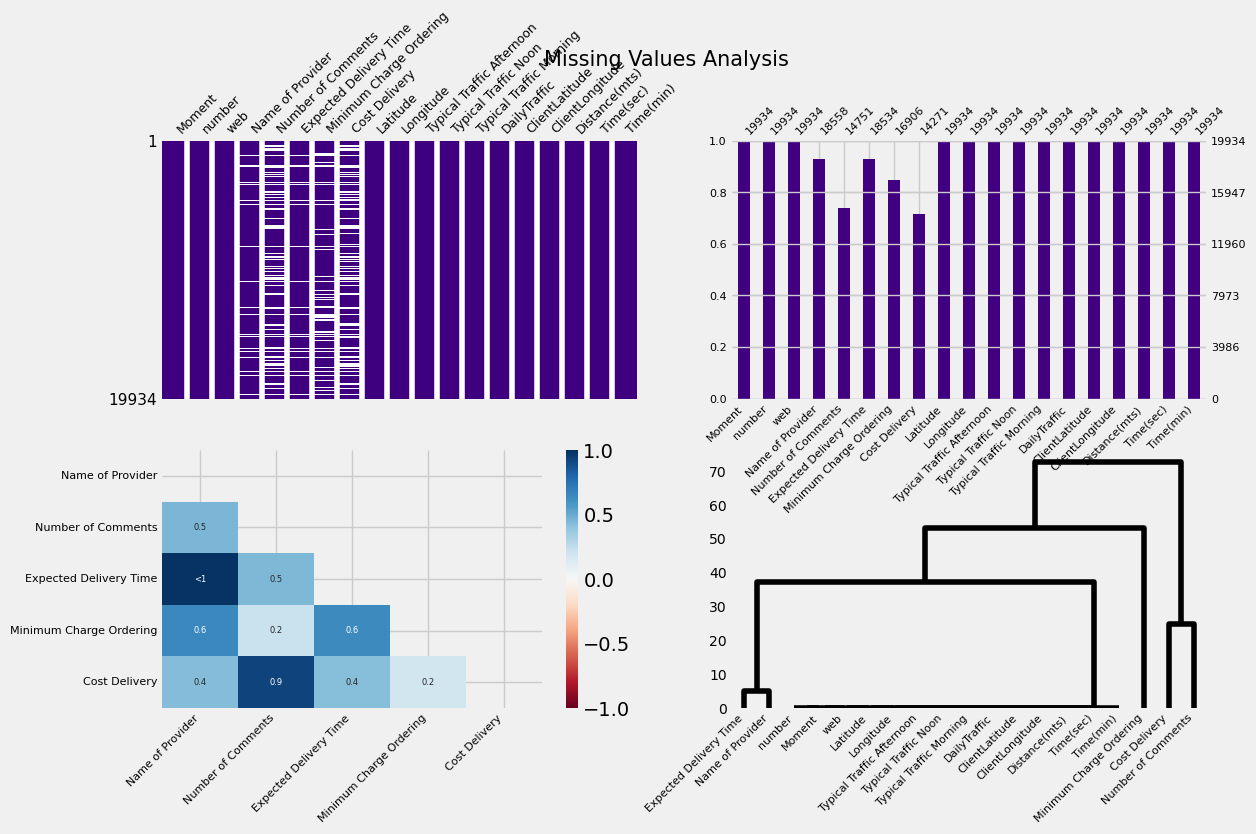

In [7]:
import missingno as msno

fig, ax = plt.subplots(2,2,figsize=(12,7))
axs = np.ravel(ax)
msno.matrix(data,  fontsize=9, color=(0.25,0,0.5),ax=axs[0]);
msno.bar(data, fontsize=8, color=(0.25,0,0.5), ax=axs[1]);
msno.heatmap(data,fontsize=8,ax=axs[2]);
msno.dendrogram(data,fontsize=8,ax=axs[3], orientation='top')

fig.suptitle('Missing Values Analysis', y=1.01, fontsize=15);


# <div style="color:darkblue;display:inline-block;border-radius:5px;background-color:#FFC928;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:darkblue;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b></b>Data Cleaning</p></div>


> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Handle missing values appropriately (e.g., replace with zeros or mean values)</b></span>


In [8]:
# Checking the null values in the data set
data.isna().sum()/len(data)*100

Moment                        0.000000
number                        0.000000
web                           0.000000
Name of Provider              6.902779
Number of Comments           26.000803
Expected Delivery Time        7.023176
Minimum Charge Ordering      15.190127
Cost Delivery                28.408749
Latitude                      0.000000
Longitude                     0.000000
Typical Traffic Afternoon     0.000000
Typical Traffic Noon          0.000000
Typical Traffic Morning       0.000000
DailyTraffic                  0.000000
ClientLatitude                0.000000
ClientLongitude               0.000000
Distance(mts)                 0.000000
Time(sec)                     0.000000
Time(min)                     0.000000
dtype: float64

In [9]:
# Replacing NaN with zeros
data_filled = data.fillna(0)

# Checking the null values in the data set after filling NaN with zeros
missing_percent = data_filled.isna().sum() / len(data_filled) * 100

print("Percentage of missing values after replacing NaN with zeros:")
print(missing_percent)

Percentage of missing values after replacing NaN with zeros:
Moment                       0.0
number                       0.0
web                          0.0
Name of Provider             0.0
Number of Comments           0.0
Expected Delivery Time       0.0
Minimum Charge Ordering      0.0
Cost Delivery                0.0
Latitude                     0.0
Longitude                    0.0
Typical Traffic Afternoon    0.0
Typical Traffic Noon         0.0
Typical Traffic Morning      0.0
DailyTraffic                 0.0
ClientLatitude               0.0
ClientLongitude              0.0
Distance(mts)                0.0
Time(sec)                    0.0
Time(min)                    0.0
dtype: float64


In [10]:
#Checking the Percentage of the null values in the dataset
null_values=data.isna().sum()
total_missing_values=null_values.sum()
percentage_missing_values=(total_missing_values)*100
print(f'The data set contains {percentage_missing_values} of values')

The data set contains 1665000 of values


> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Inspect for duplicate values and remove them if present.</b></span>

In [11]:
# Checking the duplicate values in the dataset
duplicate=data.duplicated().sum()
print(f'There are {duplicate} values in the data set; we will remove them.')

There are 0 values in the data set; we will remove them.


In [12]:
data.columns

Index(['Moment', 'number', 'web', 'Name of Provider', 'Number of Comments',
       'Expected Delivery Time', 'Minimum Charge Ordering', 'Cost Delivery',
       'Latitude', 'Longitude', 'Typical Traffic Afternoon',
       'Typical Traffic Noon', 'Typical Traffic Morning', 'DailyTraffic',
       'ClientLatitude', 'ClientLongitude', 'Distance(mts)', 'Time(sec)',
       'Time(min)'],
      dtype='object')

# <div style="color:darkblue;display:inline-block;border-radius:5px;background-color:#FFC928;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:darkblue;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b></b>Data Preparation</p></div>

> <span style='font-size:15px; font-family:Verdana;color: #254E58;'><b>Generate statistics about the data using the describe function.</b></span>

In [13]:
data.describe().style.background_gradient(cmap='tab20c')

In [14]:
data.describe(include=['object'])

Moment                                             web  \
count     19934                                           19934   
unique        3                                             871   
top     Morning  https://domicilios.com/bogota/hamper.html#menu   
freq       6965                                              24   

       Name of Provider Number of Comments Typical Traffic Afternoon  \
count             18558              14751                     19934   
unique              794                240                         3   
top                KFC                   0                    Orange   
freq                 66               2171                     13059   

       Typical Traffic Noon Typical Traffic Morning DailyTraffic  
count                 19934                   19934        19934  
unique                    3                       3           19  
top                  Orange                   Green          OOG  
freq                  14577                   13923         6830

# <div style="color:darkblue;display:inline-block;border-radius:5px;background-color:#FFC928;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:darkblue;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b></b>Data Preprocessing</p></div>

In [15]:
# Data Preprocessing (if needed)
# Convert columns to numeric
data['Expected Delivery Time'] = pd.to_numeric(data['Expected Delivery Time'], errors='coerce')
data['Typical Traffic Noon'] = pd.to_numeric(data['Typical Traffic Noon'], errors='coerce')


# <div style="color:darkblue;display:inline-block;border-radius:5px;background-color:#FFC928;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:darkblue;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b></b>Data Analysis and Visualization</p></div>

> <span style='font-size:15px; font-family:Verdana; color: #254E58;'>
    <b>Create visualizations to represent insights from the data:</b>
    <ul style='font-size:15px; font-family:Verdana; color: #254E58;'>
        <li>Plotting the distribution of Expected Delivery Time</li>
        <li>Checking the correlation matrix</li>
        <li>Creating a scatter plot of Latitude vs Longitude</li>
        <li>Scatter plot of Traffic vs Delivery Time</li>
    </ul>
> </span>


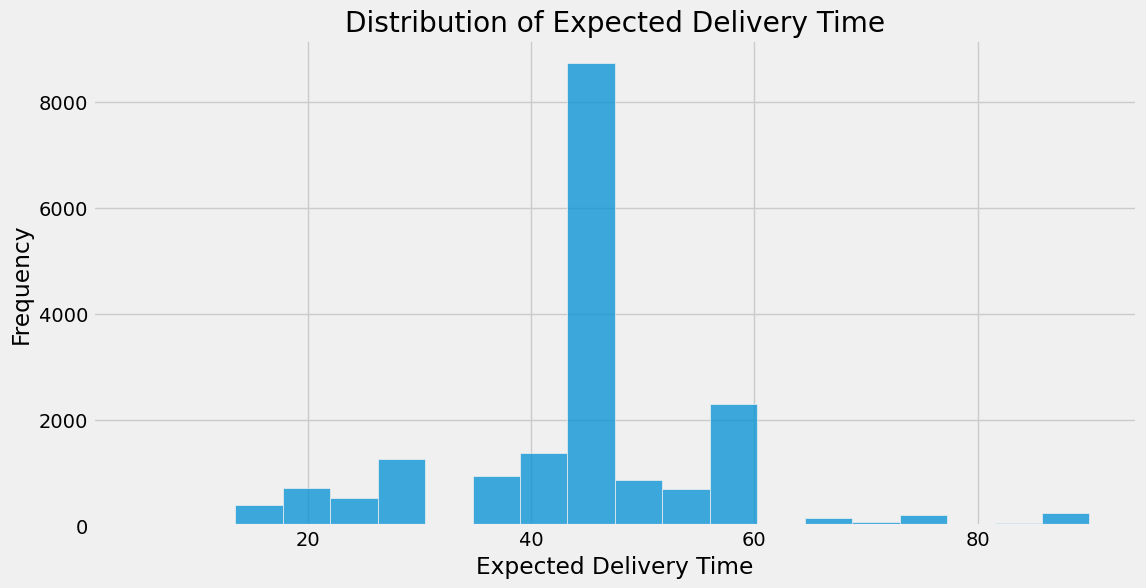

In [16]:
#  Plotting the distribution of Expected Delivery Time
sns.histplot(data=data, x='Expected Delivery Time', bins=20)
plt.title('Distribution of Expected Delivery Time')
plt.xlabel('Expected Delivery Time')
plt.ylabel('Frequency')
plt.savefig('Distribution of Expected Delivery Time.png')
plt.show()

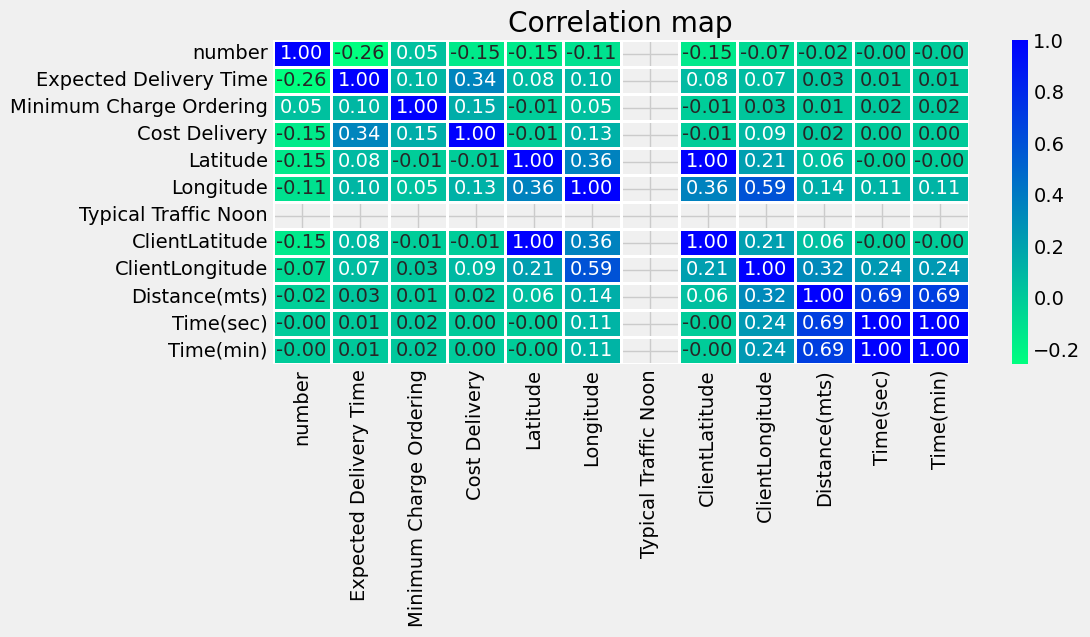

In [17]:
# Checking the correlation matrix
plt.figure(figsize=(10, 4))
sns.heatmap(data.corr(), annot=True, cmap='winter_r', fmt='.2f', linewidths=1)
plt.title("Correlation map")
plt.savefig('Correlation map.png')
plt.show()

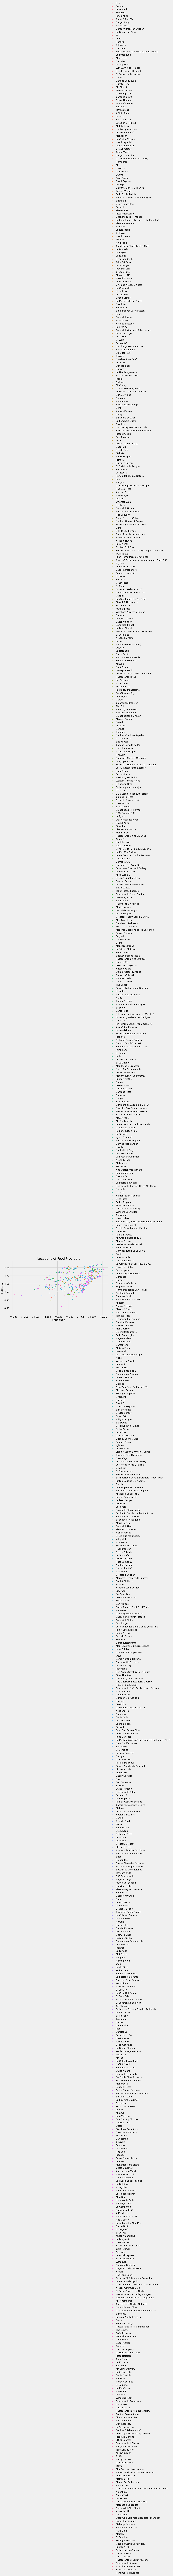

In [18]:
# Creating a scatter plot of Latitude vs Longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Longitude', y='Latitude', hue='Name of Provider')
plt.title('Locations of Food Providers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Legend on the right side
# plt.savefig('Locations of Food Providers.png')
plt.show()

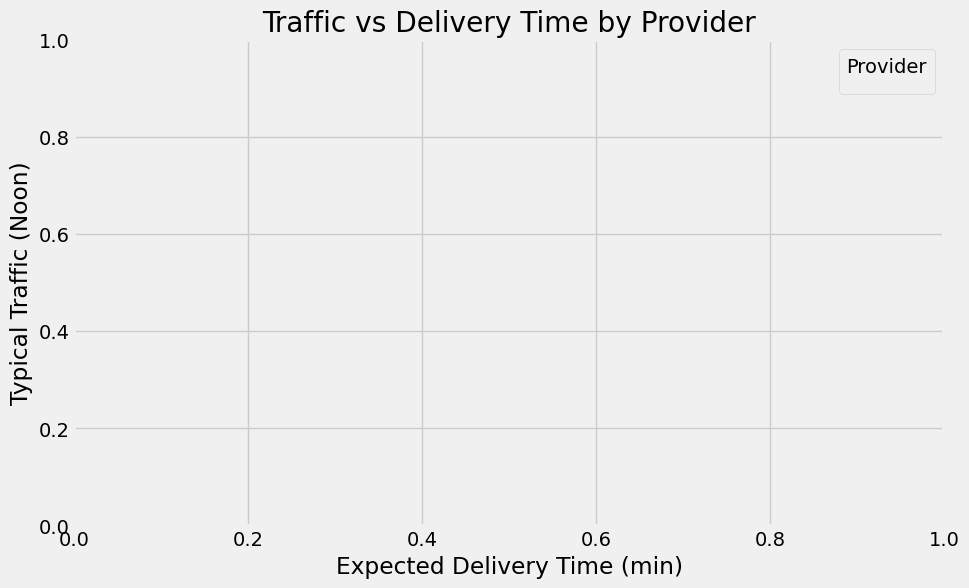

In [19]:
# Scatter plot of Traffic vs Delivery Time
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Expected Delivery Time', y='Typical Traffic Noon', hue='Name of Provider', palette='tab20', s=100)
plt.title('Traffic vs Delivery Time by Provider')
plt.xlabel('Expected Delivery Time (min)')
plt.ylabel('Typical Traffic (Noon)')
plt.legend(title='Provider', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

> <span style='font-size:15px; font-family:Verdana; color: #254E58;'>
    <b>Calculate and Print the Results:</b>
    <ul style='font-size:15px; font-family:Verdana; color: #254E58;'>
        <li>Calculate the average delivery time</li>
        <li>Calculate the correlation between Delivery Time and Traffic</li>
    </ul>
> </span>

In [20]:
# Calculate and Print Results

# Calculate the average delivery time
average_delivery_time = data['Expected Delivery Time'].mean()
print(f"Average Delivery Time: {average_delivery_time:.2f} minutes")

# Calculate the correlation between Delivery Time and Traffic
correlation = data['Expected Delivery Time'].corr(data['Typical Traffic Noon'])
print(f"Correlation between Delivery Time and Traffic: {correlation:.2f}")


Average Delivery Time: 44.59 minutes
Correlation between Delivery Time and Traffic: nan
